In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 
from scipy.optimize import curve_fit
#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 23
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [69]:
#### Some notes:
'''
Angles and Offsets (of the H- beam) easy/safe to move. 'ELENABEAM/ECOOL-ANGLE-H-mrad'
E_k electrons: at a first order, only need to change  LNR4.ECVCATHLM/REF.DIRECT.V#VALUE
I electrons: need to act, at least, LNR4.ECVGRIDLM/REF.DIRECT.V#VALUE but will probably need to adjust energy as well
-> E_k and I_e are coupled! so you might need to change both at the same time...

The current of the electron, it is in principle measured by LNR4.ECVCOLLM/MEAS.I#VALUE

The current emitted (but not necessarily going into cooling) by the gun, is should be measurable by LNR4.ECVCATHLM/MEAS.I#VALUE

To change the delay of extraction:
AEX.MW-RF/Delay#delay
mind that with 10 ms (10 ticks) delay, you extract approximately at injection

To "not start" the e-cooling process, just set to False
AX.DK3-EC/OutEnable#outEnabled

To delay the start of cooling one can increase the value of
AX.DK3-EC/Delay#delay
Note: the default value=200 1kHz ticks means start at C time 9400, i.e. about 100 ms before our "second injection"


'''

############### Initial imports
from datascout import dict_to_parquet
from datascout import parquet_to_dict
from datascout import unixtime_to_string
import numpy as np
import datascout
import re
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter



############### For nice plotting
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 8,
       }
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.dpi'] = 300

import glob

# Directory containing the files
folder_path = 'optimize_H_angles'

# Pattern to match all files in the folder
file_pattern = folder_path + '/*.parquet'

# Use glob to get a list of all files matching the pattern
file_list = glob.glob(file_pattern)

# Regular expression pattern to extract numbers at the end of the file names
pattern = re.compile(r'[-+]?\d*\.\d+|\d+')

# Initialize the angles list
angles_list = []

# Iterate over each file name and extract the number at the end
for file_name in file_list:
    # Extract the number at the end of the file name
    match = re.search(pattern, file_name)
    if match:
        angle = float(match.group())
        angles_list.append(angle)

# # Print the list of angles
# print("Angles:", angles)


In [70]:
angles_list

[-0.010204081632653073,
 -0.05102040816326536,
 -0.0918367346938776,
 -0.13265306122448983,
 -0.17346938775510207,
 -0.2142857142857143,
 -0.25510204081632654,
 -0.29591836734693877,
 -0.33673469387755106,
 -0.37755102040816324,
 -0.41836734693877553,
 -0.45918367346938777,
 0.030612244897959107,
 0.0714285714285714,
 0.11224489795918358,
 0.15306122448979587,
 0.19387755102040816,
 0.23469387755102034,
 0.2755102040816326,
 0.3163265306122448,
 0.3571428571428571,
 0.3979591836734693,
 0.43877551020408156,
 0.47959183673469385,
 0.5204081632653061,
 0.5612244897959182,
 0.6020408163265305,
 0.6428571428571428,
 0.6836734693877551,
 0.7244897959183672,
 0.7653061224489794,
 0.8061224489795917,
 0.846938775510204,
 0.8877551020408163,
 0.9285714285714284,
 0.9693877551020407,
 1.010204081632653,
 1.0510204081632653,
 1.0918367346938773,
 1.1326530612244896,
 1.173469387755102,
 1.2142857142857142,
 1.252,
 1.253,
 1.254,
 1.255,
 1.2551020408163265,
 1.256,
 1.2959183673469385,
 1.33673

angle_value -0.010204081632653073
angle_value -0.05102040816326536
angle_value -0.0918367346938776
angle_value -0.13265306122448983
angle_value -0.17346938775510207
angle_value -0.2142857142857143
angle_value -0.25510204081632654
angle_value -0.29591836734693877
angle_value -0.33673469387755106
angle_value -0.37755102040816324
angle_value -0.41836734693877553
angle_value -0.45918367346938777
angle_value 0.030612244897959107
angle_value 0.0714285714285714
angle_value 0.11224489795918358
angle_value 0.15306122448979587
angle_value 0.19387755102040816
angle_value 0.23469387755102034
angle_value 0.2755102040816326
angle_value 0.3163265306122448
angle_value 0.3571428571428571
angle_value 0.3979591836734693
angle_value 0.43877551020408156
angle_value 0.47959183673469385
angle_value 0.5204081632653061
angle_value 0.5612244897959182
angle_value 0.6020408163265305
angle_value 0.6428571428571428
angle_value 0.6836734693877551
angle_value 0.7244897959183672
angle_value 0.7653061224489794
angle_va

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

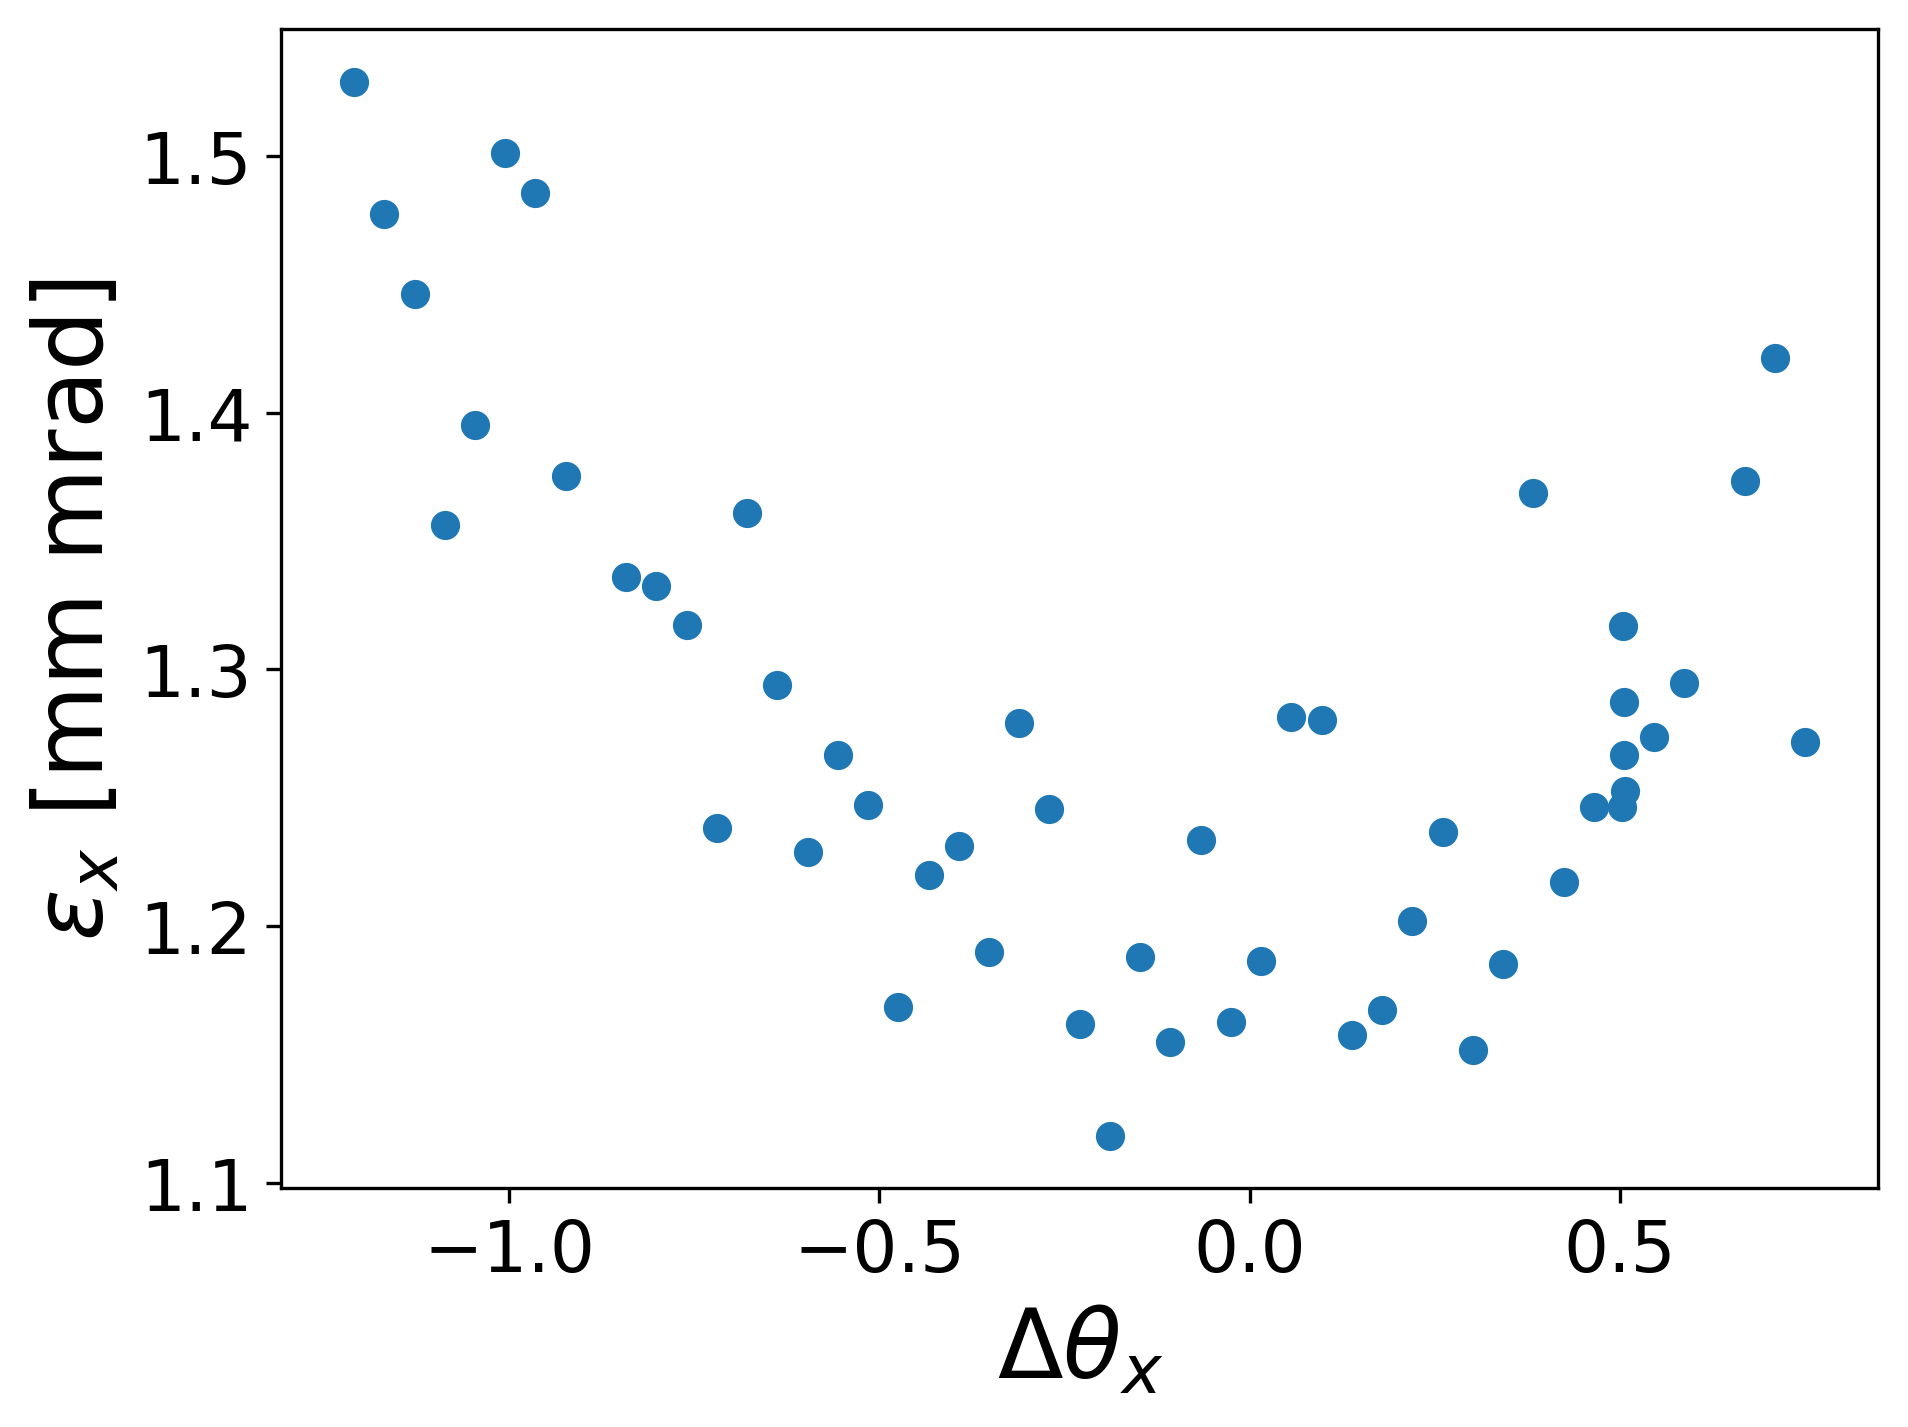

In [71]:


data=np.load('optimize_H_angles/angles.npz')
n_steps=data['n_steps']
delay_fixed=data['delay_fixed']
# num_samples=data['num_samples']
# repeated_angles=data['repeated_angles']
#horiztonal plane

beta_x = 7.6 #m
beta_y = 1.3 #m
D_x = 0.3  #m


horizontal_list = []
vertical_list = []
vertical_integral_list = []
horizontal_integral_list = []


filter_horizontal = []
filter_horizontal_intensity = []

filter_vertical = []
filter_vertical_intensity = []
filter_angles=[]

for i,angle_value in enumerate(angles_list):

        print('angle_value', angle_value)
        data_to_look_at = parquet_to_dict(f'optimize_H_angles/{angle_value}.parquet')
        # BPM = data_to_look_at['LNE00.BSGW.0008/Acquisition']['value']
        BPM = data_to_look_at['LNE50.BSGW.5020/Acquisition']['value']
        vertical = BPM['sigma'][0]
        horizontal = BPM['sigma'][1]
        emittance_x = horizontal**2/beta_x
        emittance_y = vertical ** 2 / beta_y

        vertical_list.append(emittance_y)
        horizontal_list.append(emittance_x)

        integral_y = BPM['rawIntegrals'][0]
        integral_x = BPM['rawIntegrals'][1]
        vertical_integral_list.append(integral_y)
        horizontal_integral_list.append(integral_x)

        filter_threshold_upper = 10
        filter_threshold_lower = 0
        integral_threshold = 5000


        condition_sigma_x = filter_threshold_lower <emittance_x < filter_threshold_upper
        condition_sigma_y = filter_threshold_lower <emittance_y < filter_threshold_upper
        condition_intensity_x = integral_x > integral_threshold
        condition_intensity_y = integral_y > integral_threshold

        if condition_sigma_x & condition_sigma_y & condition_intensity_x & condition_intensity_y:
                filter_horizontal.append(emittance_x)
                filter_vertical.append(emittance_y)
                filter_horizontal_intensity.append(integral_x)
                filter_vertical_intensity.append(integral_y)
                filter_angles.append(angle_value)



shifted_angles = [angle - 0.75 for angle in filter_angles]

plt.figure()
plt.scatter(shifted_angles,filter_horizontal)
plt.ylabel('$\epsilon_x$ [mm mrad]')
plt.xlabel('$\Delta \\theta_x$')
# plt.legend()
plt.tight_layout()
plt.show()

# plt.figure()
# plt.scatter(filter_angles[1:],filter_vertical[1:])
# plt.ylabel('$\epsilon_x$ [mm mrad]')
# plt.xlabel('Angle_x ')
# # plt.legend()
# plt.tight_layout()
# plt.show()

np.savez('results/optimize_angles.npz', shifted_angles=shifted_angles, filter_horizontal=filter_horizontal)

